In [1]:
# Imports
import numpy as np
import os
from matplotlib import pyplot as plt
import h5py as h5
from PyXRIM.Corrections import Corrector
from PyXRIM.misc import  bin_ndarray
from functions import *
from decompFunctions import *
%matplotlib notebook

In [2]:
#Inputs
fname = 'D:\Libraries\Documents\Materials Informatics\LiCoO2_Al2O3_20160330.hdf5'
datasets = ['S026','S027','S028'] # name of raw dataset
procRefName = 'bkg_corrected' # reference name to append to rawData

In [3]:
# open h5file
f = h5.File(fname, mode='r') 
# Always open in read mode 'r'.
# Until you're ready to write into the file. This is especially true if your OS is not Unix-based like Windows.
rawg = f['20160330/Raw']
procg = f['20160330/Process']
meta = f['20160330/Meta']

In [4]:
#roi1x=slice(250,640)
#roi1y=slice(510,900)  #original 1024

roi1x=slice(0,1024)
roi1y=slice(0,1024)  #original 1024


i = 0;
for name in datasets:
    rawDset = rawg[name]
    procDset = f[rawDset.attrs['bkg_corrected']]   

    if i == 0:
        #data = procDset[:,:,:]
        data = procDset[:,roi1x,roi1y]
        datalog = procDset[:,roi1x,roi1y]+10
    
        twotheta = rawDset.attrs['delta']
        
        i = 1
    else:
        #data = np.vstack([data, procDset[:,:,:]])
        data = np.vstack([data, procDset[:,roi1x,roi1y]])
        datalog = np.vstack([datalog, procDset[:,roi1x,roi1y]+10])

        twotheta = np.hstack([twotheta,rawDset.attrs['delta']])
        
    print data.shape

        
#name1 = 'S026'
#rawDset1 = rawg[name1]
#procDset1 = f[rawDset1.attrs['bkg_corrected']]          
#data = [procDset1[:,:,:]+10]
#twotheta = rawDset1.attrs['delta']
#print data[0].shape

#TODOT
#np.destack or np.vertstack
#We want to give 3 np.arrays with a qsize, x and y - come up with an array with a 0 axis that has 
# do it with np.array

#arr_1 = np.zeros(shape=(6,1024,1024))
#arr_2 = np.zeros(shape=(3,1024,1024))

#arr_comb = np.concatentate([arr_1,arr_2], axis=0)
#arr_comb = np.vstack([arr_1,arr_2])
#dstack, hstack as well

#fig,ax = plt.subplots()
#ax.plot(twotheta,normInt,marker = 'o', markerfacecolor='r')
#ax.set_xlabel('$2\\theta$ (deg.)')
#ax.set_ylabel('$\log (Intensity) $ (arb. units)')

(41L, 1024L, 1024L)
(77L, 1024L, 1024L)
(88L, 1024L, 1024L)


In [5]:
print data.shape
print datalog.shape
print twotheta

(88L, 1024L, 1024L)
(88L, 1024L, 1024L)
[ 14.5398  14.5577  14.5756  14.5936  14.6115  14.6294  14.6474  14.6653
  14.6832  14.7012  14.7191  14.737   14.7549  14.7729  14.7908  14.8087
  14.8267  14.8446  14.8626  14.8805  14.8984  14.9164  14.9343  14.9522
  14.9702  14.9881  15.006   15.024   15.0419  15.0599  15.0778  15.0957
  15.1137  15.1316  15.1496  15.1675  15.1854  15.2034  15.2213  15.2393
  15.2572  14.9812  14.9922  15.0033  15.0143  15.0254  15.0364  15.0474
  15.0585  15.0695  15.0806  15.0916  15.1026  15.1137  15.1247  15.1358
  15.1468  15.1578  15.1689  15.1799  15.191   15.202   15.213   15.2241
  15.2351  15.2462  15.2572  15.2682  15.2793  15.2903  15.3014  15.3124
  15.3235  15.3345  15.3455  15.3566  15.3676  15.3676  15.3787  15.3897
  15.4008  15.4118  15.4228  15.4339  15.4449  15.456   15.467   15.4781]


<IPython.core.display.Javascript object>


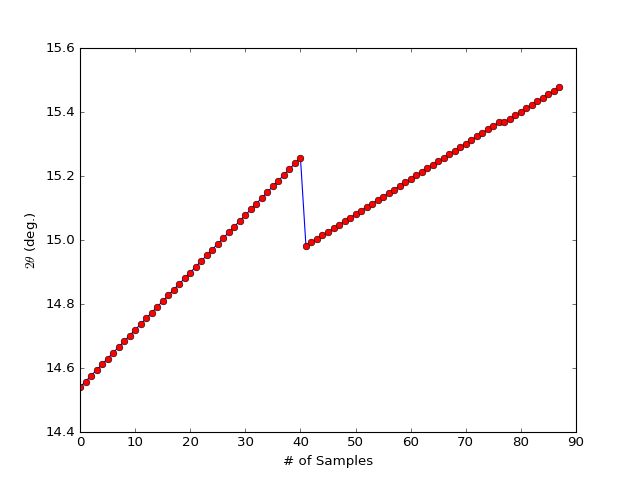

In [5]:
fig,ax = plt.subplots()
ax.plot(twotheta,marker = 'o', markerfacecolor='r')
ax.set_xlabel('# of Samples')
ax.set_ylabel('$2\\theta$ (deg.)')

<IPython.core.display.Javascript object>


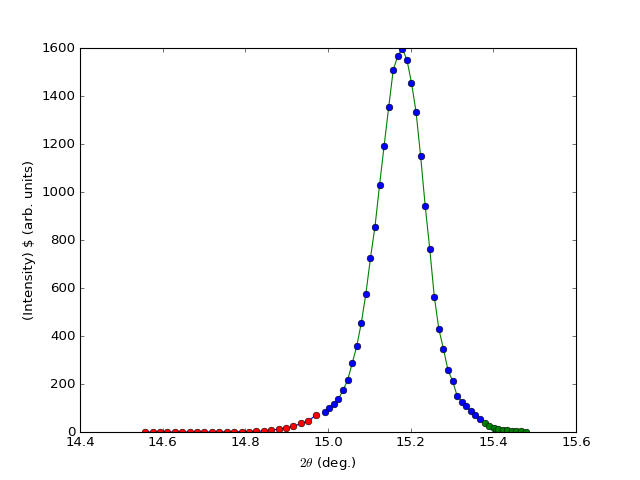

In [7]:
normInt = np.mean(data[0,:,:])
for n in range(1,data.shape[0]):
    mean = np.mean(data[n,:,:])
    normInt = np.hstack([normInt,mean])
    
fig,ax = plt.subplots()
ax.plot(twotheta[1:25],normInt[1:25],marker = 'o', markerfacecolor='r')
ax.set_xlabel('$2\\theta$ (deg.)')
ax.set_ylabel('(Intensity) $ (arb. units)')
                               
ax.plot(twotheta[42:77],normInt[42:77],marker = 'o', markerfacecolor='b')
ax.plot(twotheta[78:88],normInt[78:88],marker = 'o', markerfacecolor='g')

In [6]:
##Insert DELETE CODE
delete = [0]

data_new = np.vstack([data[1:25,:,:],data[42:88,:,:]])
datalog_new = np.vstack([datalog[1:25,:,:],datalog[42:88,:,:]])
twotheta_new = np.hstack([twotheta[1:25],twotheta[42:88]])

print data_new.shape
print datalog_new.shape
print twotheta_new.shape

(70L, 1024L, 1024L)
(70L, 1024L, 1024L)
(70L,)


dataList = data
data2 = np.array([data2 for data2 in dataList])
qsize = sum([l.shape[0] for l in dataList])
xsize, ysize = dataList[0].shape[1], dataList[0].shape[-1]
print data2.shape
print qsize
print ysize
print xsize
data2 = data2.reshape(qsize, ysize, xsize)

<IPython.core.display.Javascript object>


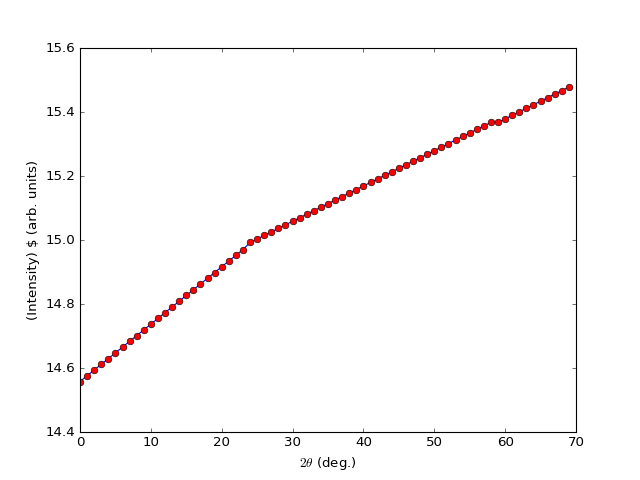

In [7]:
fig,ax = plt.subplots()
ax.plot(twotheta_new,marker = 'o', markerfacecolor='r')
ax.set_xlabel('$2\\theta$ (deg.)')
ax.set_ylabel('(Intensity) $ (arb. units)')

<IPython.core.display.Javascript object>


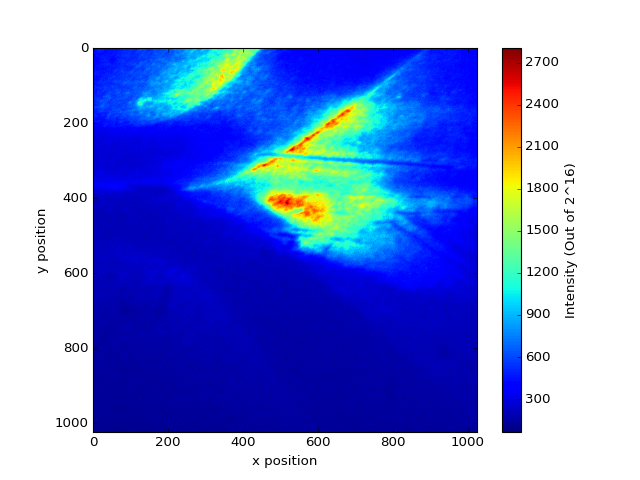

In [10]:
fig,ax = plt.subplots()
cax = ax.imshow(data[30,:,:])
cbar = fig.colorbar(cax)
cbar.set_label('Intensity (Out of 2^16)')
ax.set_xlabel('x position')
ax.set_ylabel('y position')


In [8]:
# PCA
xvals= twotheta_new
# You should do one PCA with logscaling = True and another with logscaling = False to compare.
data_prep = preping(data_new, logscaling = False, feature_scaling=False, feature_range=(0.1,1))
datalog_prep = preping(datalog_new, logscaling = True, feature_scaling=False, feature_range=(0.1,1))


-192.440931706


<IPython.core.display.Javascript object>


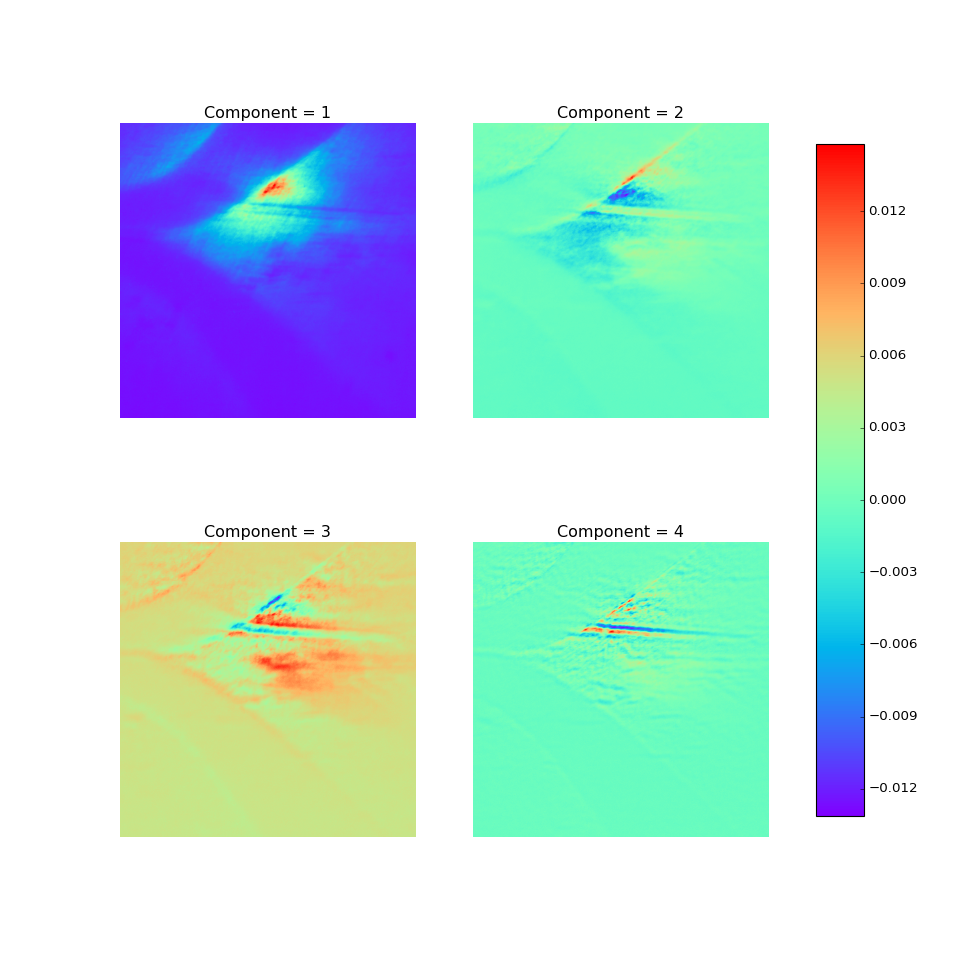

<IPython.core.display.Javascript object>


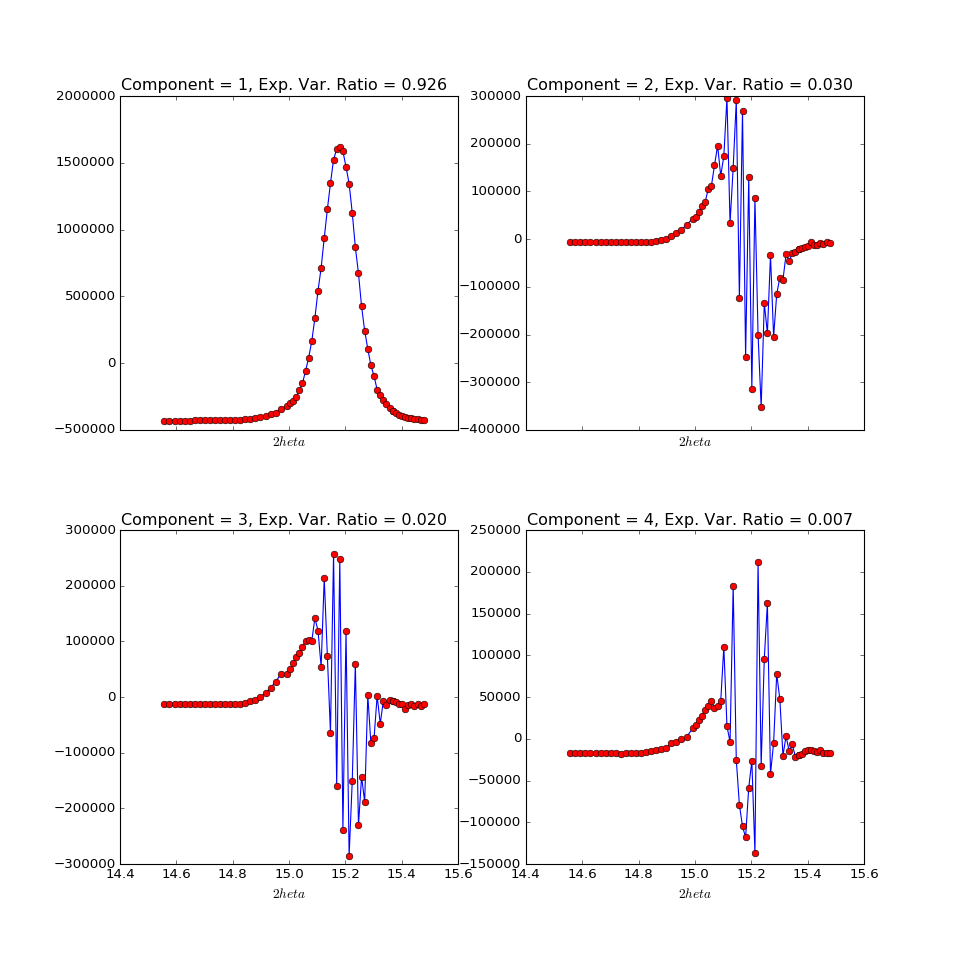

In [10]:
# set the number of principal components we want PCA to use. Try multiple numbers.
n_comp = 4
r_comp = 20
#projec, eigenvec, var_ratio, pca = doPCA(data2, n_comp, xvals=xvals,xlabel='$2\theta$',cmap='rainbow')
projec, eigenvec, var_ratio, pca = doPCA(data_prep, n_comp,xvals=xvals,xlabel='$2\theta$',
                                         cmap='rainbow',normalize = True, returnComponents = r_comp)

<IPython.core.display.Javascript object>


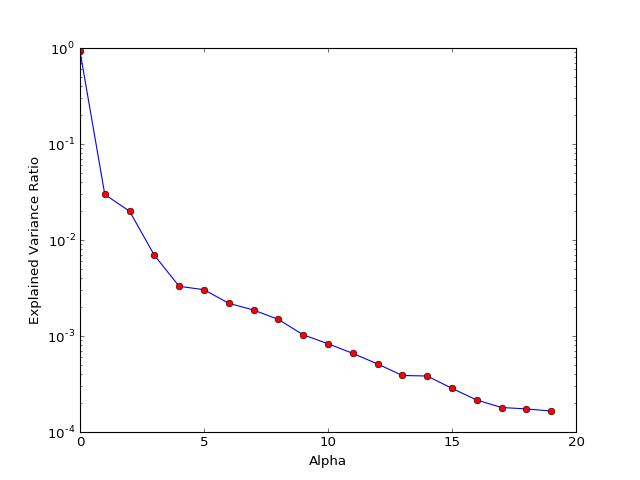

In [16]:
v = var_ratio[0]
for i in range(1,var_ratio.shape[0]):
    v = np.hstack([v,var_ratio[i]])

fig,ax = plt.subplots()
ax.plot(v,marker = 'o', markerfacecolor='r')
ax.set_xlabel('Alpha')
ax.set_xlim([0,20])
ax.set_ylabel('Explained Variance Ratio')
ax.set_ylim([0.0001,1])
ax.set_yscale("log", nonposy='clip')

2.31253542399


<IPython.core.display.Javascript object>


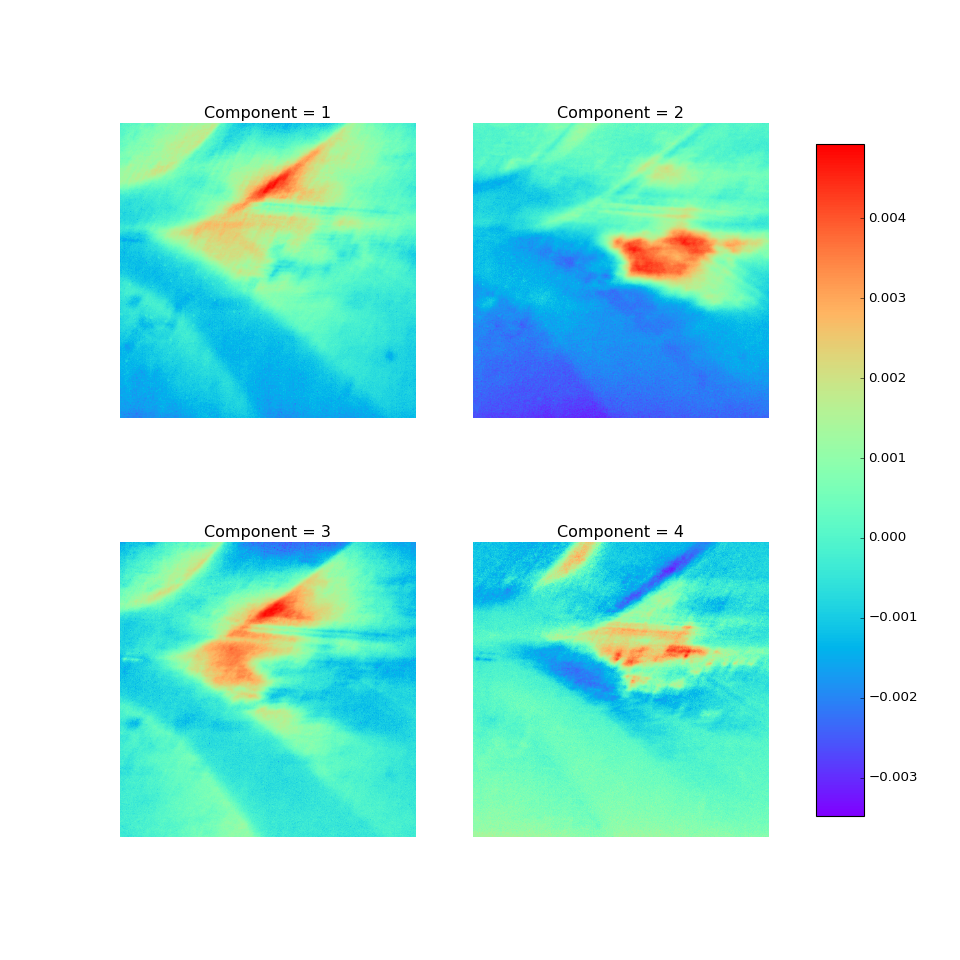

<IPython.core.display.Javascript object>


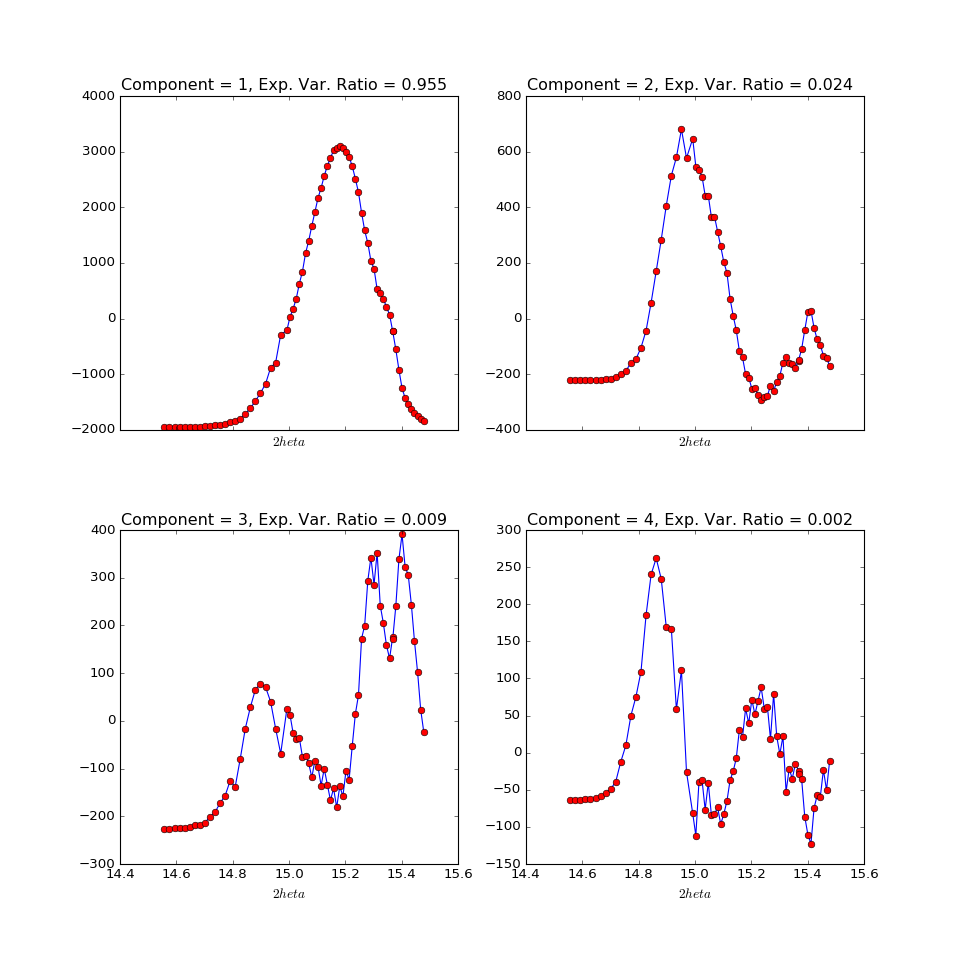

In [11]:
# set the number of principal components we want PCA to use. Try multiple numbers.
n_comp = 4
r_comp = 20
#projec, eigenvec, var_ratio, pca = doPCA(data2, n_comp, xvals=xvals,xlabel='$2\theta$',cmap='rainbow')
projec, eigenvec, var_ratio, pca = doPCA(datalog_prep, n_comp,xvals=xvals,xlabel='$2\theta$',
                                         cmap='rainbow',normalize = True, returnComponents = r_comp)

<IPython.core.display.Javascript object>


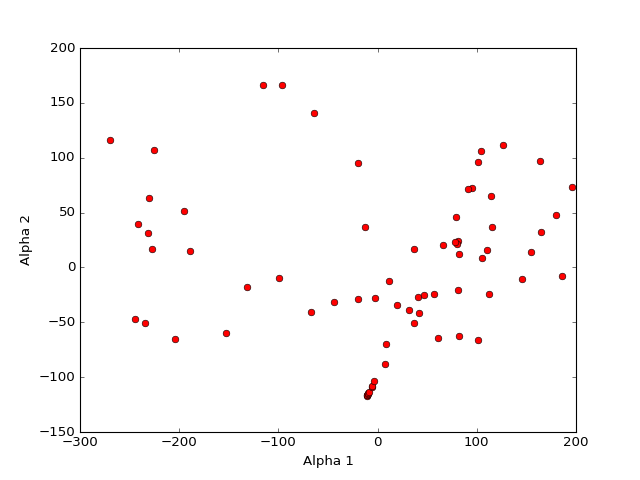

<IPython.core.display.Javascript object>


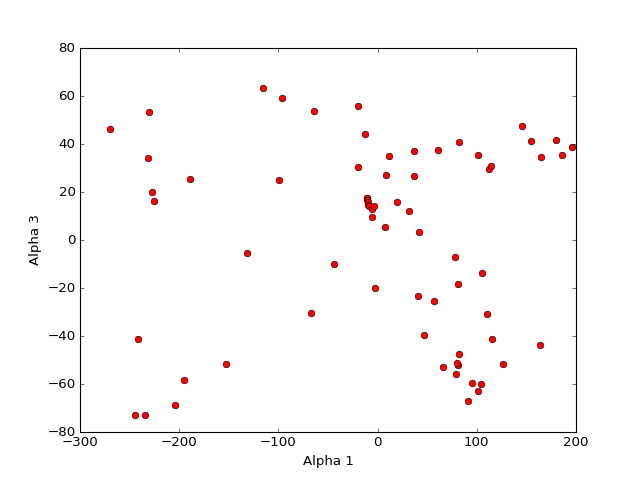

<IPython.core.display.Javascript object>


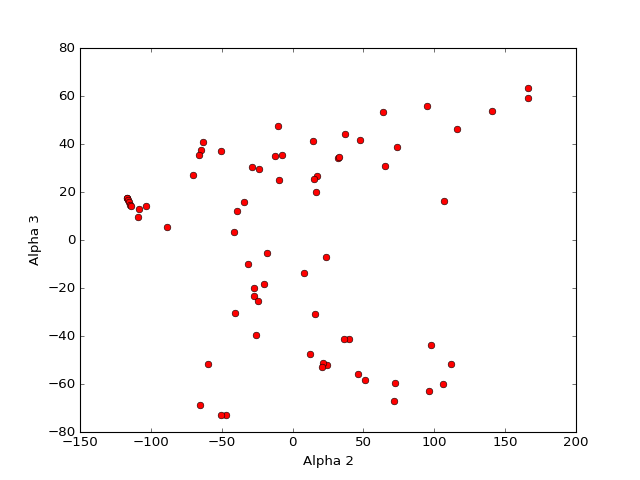

In [15]:
fig,ax = plt.subplots()
ax.plot(eigenvec[:,1],eigenvec[:,2],'ro')
ax.set_xlabel('Alpha 1')
ax.set_ylabel('Alpha 2')

fig,ax = plt.subplots()
ax.plot(eigenvec[:,1],eigenvec[:,3],'ro')
ax.set_xlabel('Alpha 1')
ax.set_ylabel('Alpha 3')

fig,ax = plt.subplots()
ax.plot(eigenvec[:,2],eigenvec[:,3],'ro')
ax.set_xlabel('Alpha 2')
ax.set_ylabel('Alpha 3')

<IPython.core.display.Javascript object>


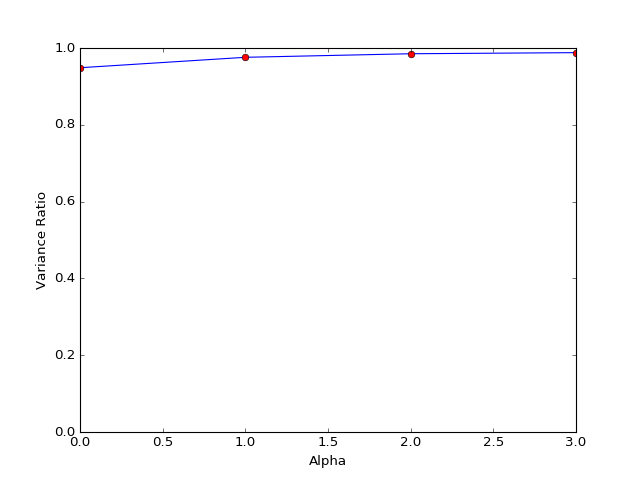

(0, 1)

In [16]:
v = var_ratio[0]
for i in range(1,var_ratio.shape[0]):
    v = np.hstack([v,var_ratio[i]])

fig,ax = plt.subplots()
ax.plot(v,marker = 'o', markerfacecolor='r')
ax.set_xlabel('Alpha')
ax.set_xlim([0,20])
ax.set_ylabel('Explained Variance Ratio')
ax.set_ylim([0.0001,1])
ax.set_yscale("log", nonposy='clip')

<IPython.core.display.Javascript object>


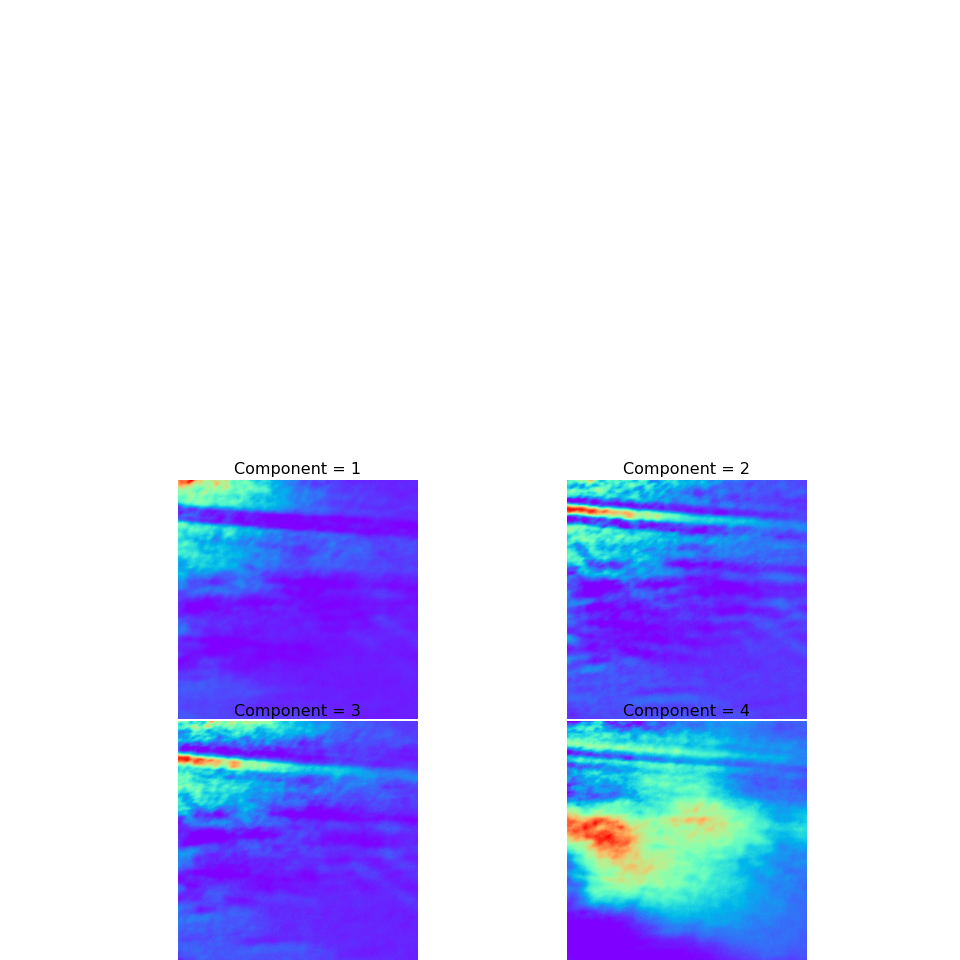

<IPython.core.display.Javascript object>


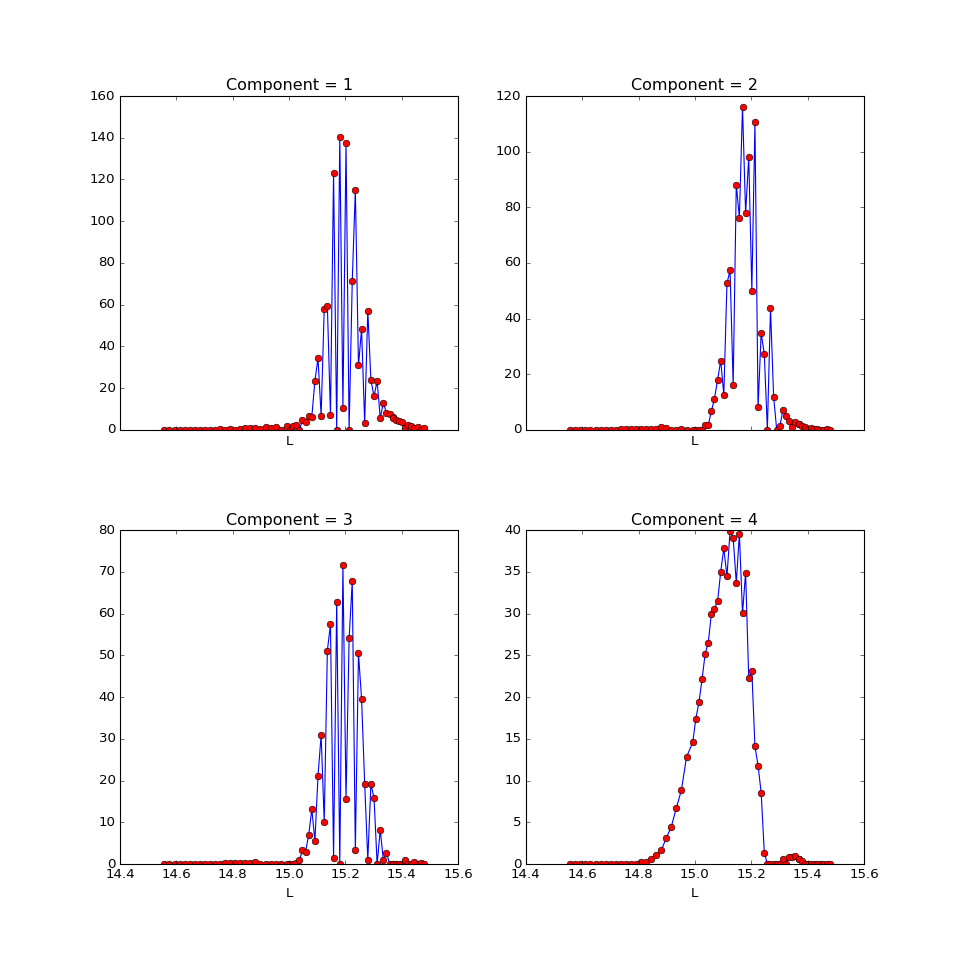

In [17]:
# Same as before, except now use NMF
n_comp = 4
projec, eigenvec, nmf = doNMF(data_prep, 4, xvals=xvals,xlabel='L',cmap='rainbow')

<IPython.core.display.Javascript object>


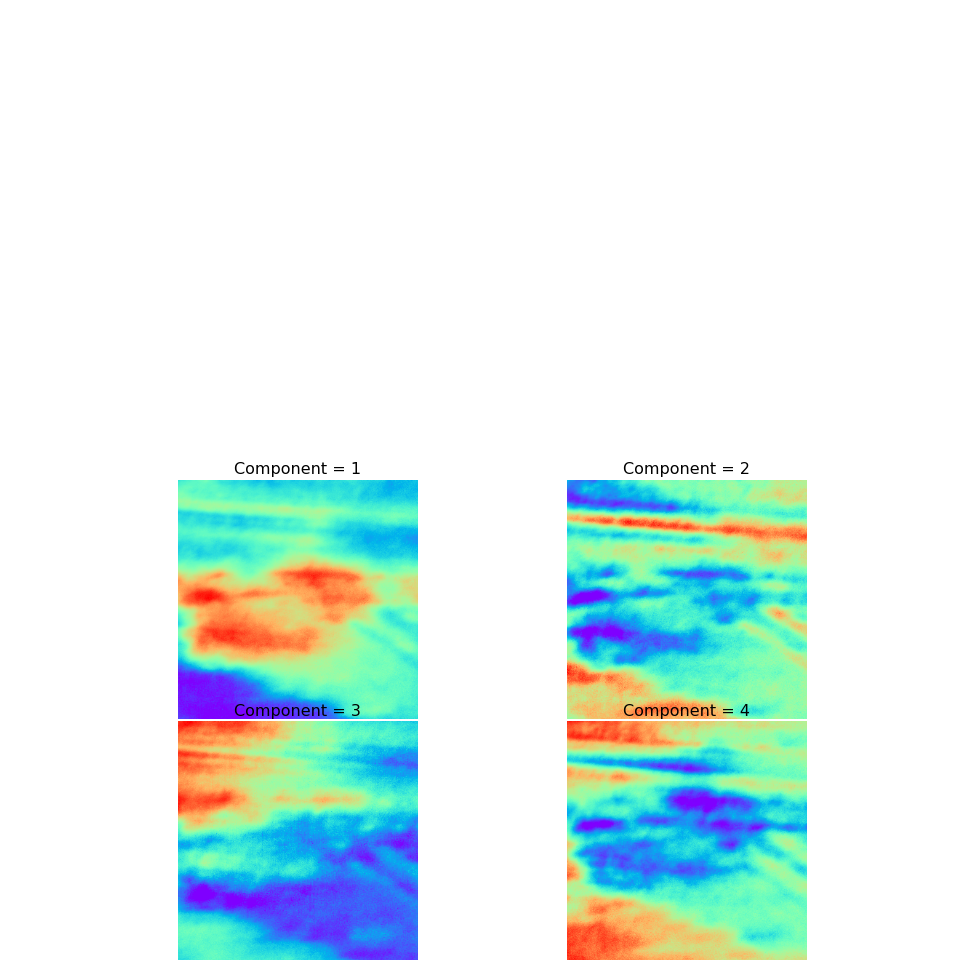

<IPython.core.display.Javascript object>


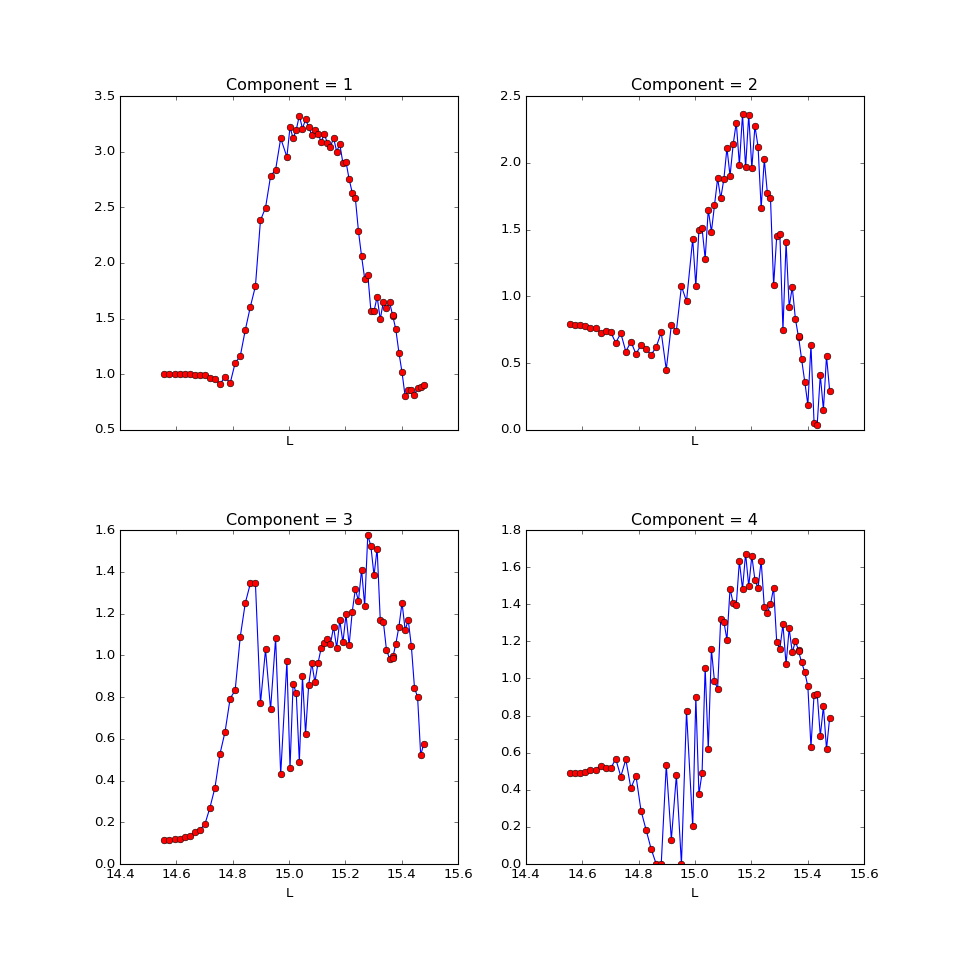

In [18]:
# Same as before, except now use NMF
n_comp = 4
projec, eigenvec, nmf = doNMF(datalog_prep, n_comp, xvals=xvals,xlabel='L',cmap='rainbow')

<IPython.core.display.Javascript object>


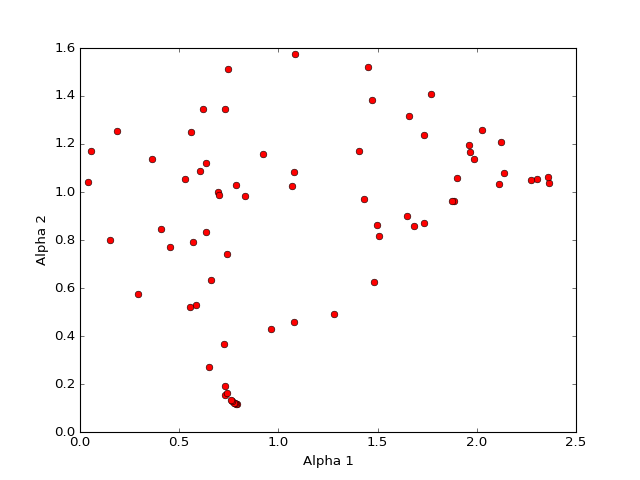

<IPython.core.display.Javascript object>


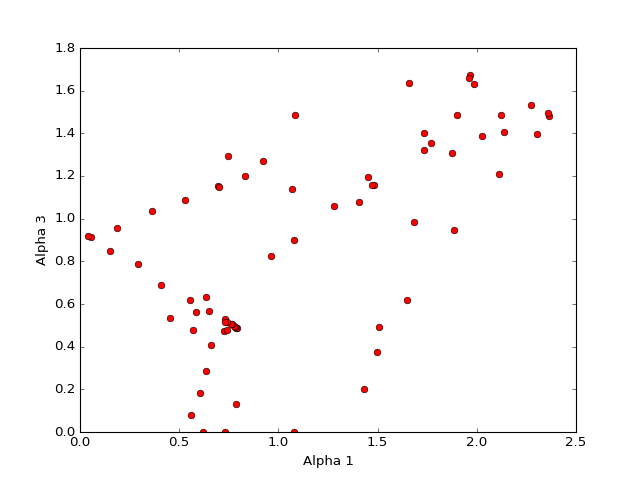

<IPython.core.display.Javascript object>


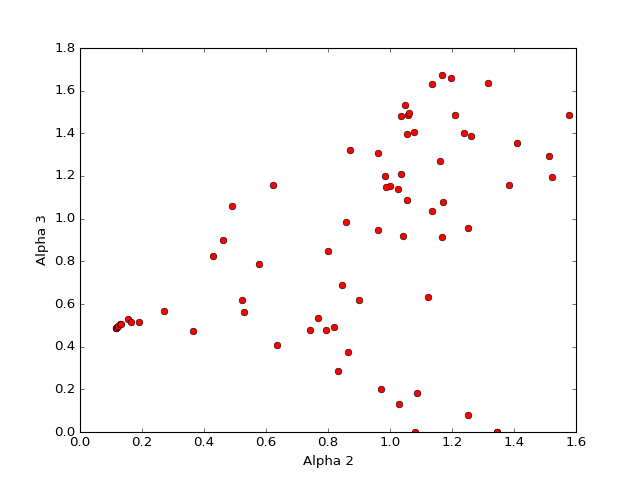

D:\Users\JSestito\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


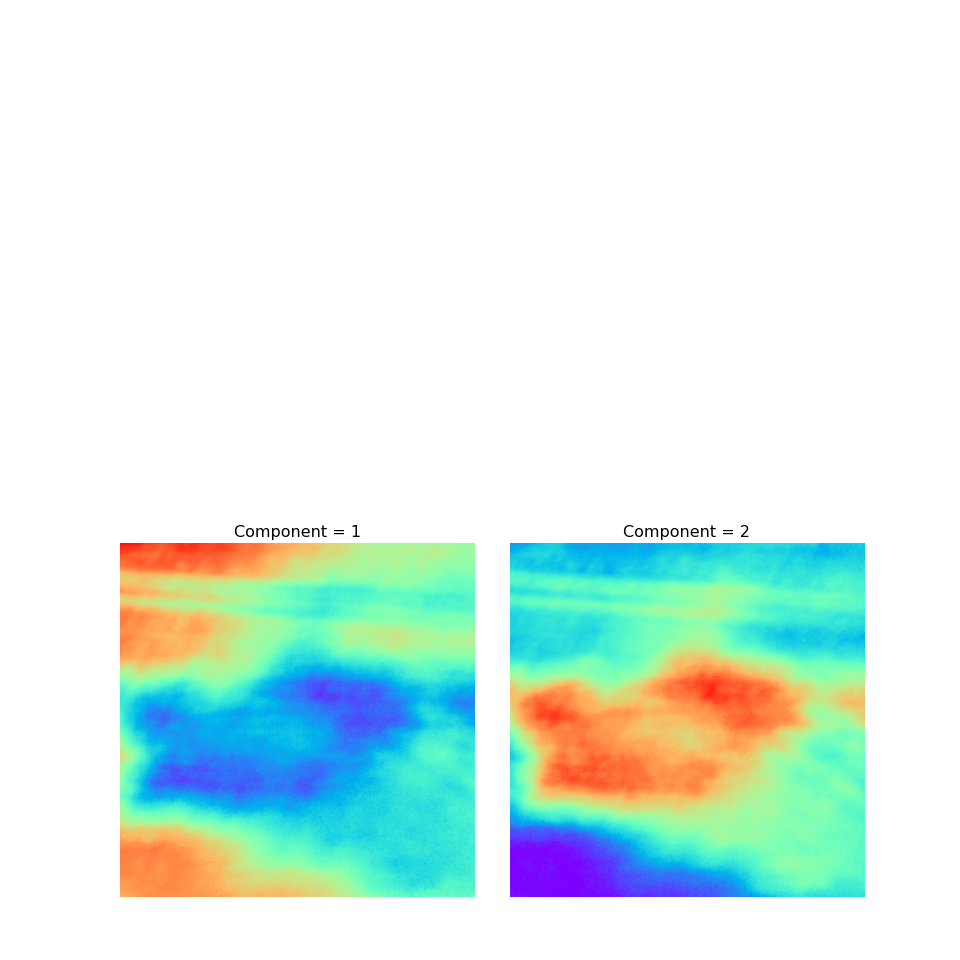

<IPython.core.display.Javascript object>


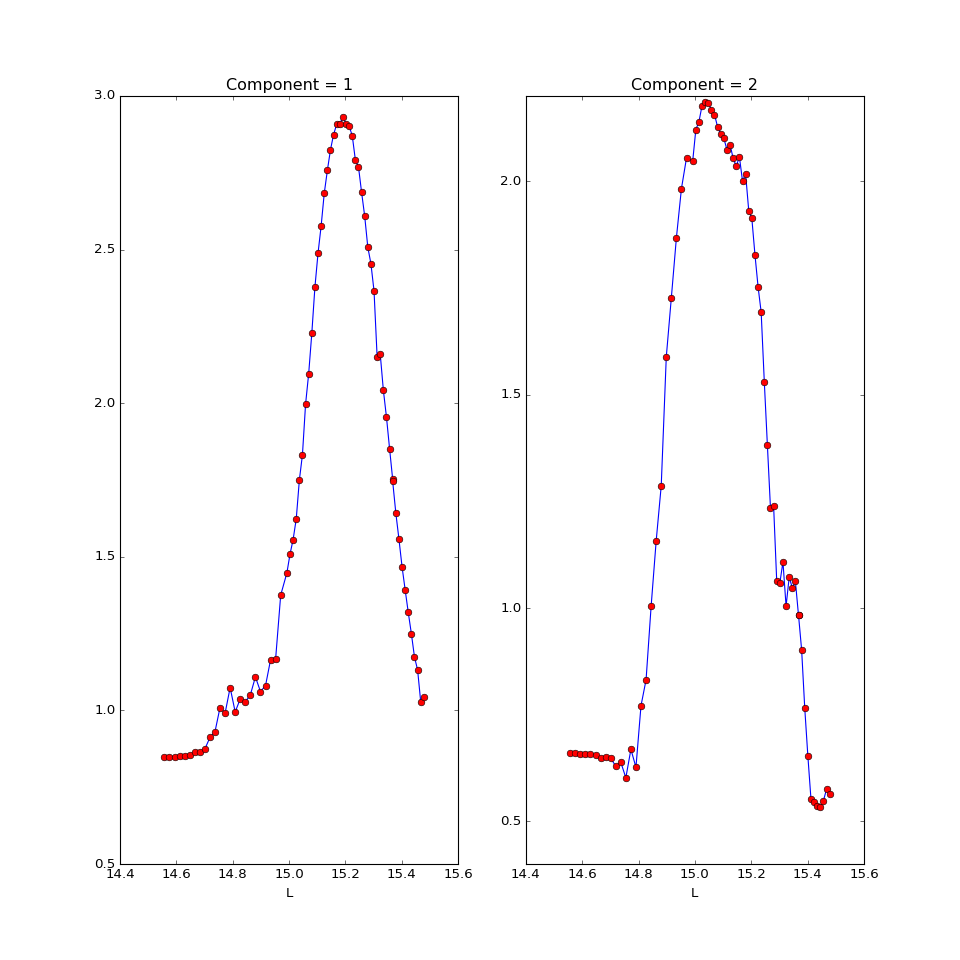

In [20]:
# Same as before, except now use NMF
n_comp = 2
projec, eigenvec, nmf = doNMF(datalog_prep, n_comp, xvals=xvals,xlabel='L',cmap='rainbow')